# Online Shoppers Purchasing Intention Dataset
[dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

Target: to predict the revenue of instances

## Preprocess the Data
### Load the Data

In [1]:
import pandas as pd

data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Map string to int

In [2]:
Month_map = { 'Feb':0, 'Mar':1, 'May':2, 'June':3, 'Jul':4, 'Aug':5, 'Sep':6, 'Oct':7, 'Nov':8, 'Dec':9 }
Visitor_map = { 'Returning_Visitor':0, 'New_Visitor':1, 'Other':2 }

data['Month'] = data['Month'].map(Month_map)
data['VisitorType'] = data['VisitorType'].map(Visitor_map)
data.isnull().sum(axis = 0)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [3]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,9,4,6,1,1,0,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,8,3,2,1,8,0,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,8,3,2,1,13,0,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,8,2,2,3,11,0,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,8,3,2,1,2,1,True,False


### Split testing and training data

Training data will be the first 5000 instances, and testing data will be the rest.

In [4]:
x_train = data[:5000].drop('Revenue',1)
y_train = data[:5000]['Revenue']

x_test = data[5000:].drop('Revenue',1)
y_test = data[5000:]['Revenue']

x_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,1,1,1,1,0,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,2,2,1,2,0,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,4,1,9,3,0,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,3,2,2,4,0,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,0,3,3,1,4,0,True


In [5]:
x_test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
5000,0,0.0,0,0.0,6,77.000000,0.000000,0.016667,0.0,0.6,2,2,2,2,4,0,False
5001,1,7.0,0,0.0,15,421.500000,0.000000,0.033333,0.0,0.6,2,3,2,1,3,0,False
5002,0,0.0,0,0.0,70,1453.900000,0.010145,0.020773,0.0,0.4,2,2,6,7,3,0,False
5003,1,28.0,0,0.0,12,408.500000,0.000000,0.018182,0.0,0.0,2,1,8,3,3,0,True
5004,2,1172.0,0,0.0,24,1244.066667,0.008000,0.028000,0.0,0.0,2,1,8,2,6,0,False


## Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)

y_predict = clf.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

/home/dianarolien/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8447476125511596

### Improvement
1. Increase training instances

In [7]:
x_train = data[:6000].drop('Revenue',1)
y_train = data[:6000]['Revenue']

x_test = data[6000:].drop('Revenue',1)
y_test = data[6000:]['Revenue']

clf = LogisticRegression().fit(x_train, y_train)
y_predict = clf.predict(x_test)

accuracy_score(y_test, y_predict)

/home/dianarolien/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8494470774091627

In [8]:
x_train = data[:7000].drop('Revenue',1)
y_train = data[:7000]['Revenue']

x_test = data[7000:].drop('Revenue',1)
y_test = data[7000:]['Revenue']

clf = LogisticRegression().fit(x_train, y_train)
y_predict = clf.predict(x_test)

accuracy_score(y_test, y_predict)

/home/dianarolien/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8459662288930582

The accuracies seem like the same.

2.class_weight

In [14]:
x_train = data[:6000].drop('Revenue',1)
y_train = data[:6000]['Revenue']

x_test = data[6000:].drop('Revenue',1)
y_test = data[6000:]['Revenue']

class_weight = { 0:0.3, 1:0.7 }
clf = LogisticRegression(class_weight = class_weight).fit(x_train, y_train)
y_predict = clf.predict(x_test)

accuracy_score(y_test, y_predict)

/home/dianarolien/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8541864139020537

好像高了1%

## SVM
試試別的方法

In [18]:
from sklearn.svm import SVC
  
svm.fit(x_train, y_train)
  
y_predict = svm.predict(x_test)
accuracy_score(y_test, y_predict)

/home/dianarolien/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8020537124802528

In [19]:
svm = SVC(class_weight = class_weight)
svm.fit(x_train, y_train)
  
y_predict = svm.predict(x_test)
accuracy_score(y_test, y_predict)

/home/dianarolien/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8020537124802528

## Neural Network


Epoch 1/100
6000/6000 [==============================] - 1s 118us/step - loss: 0.3600 - acc: 0.8903
Epoch 2/100
6000/6000 [==============================] - 0s 44us/step - loss: 0.3397 - acc: 0.8908
Epoch 3/100
6000/6000 [==============================] - 0s 43us/step - loss: 0.3389 - acc: 0.8908
Epoch 4/100
6000/6000 [==============================] - 0s 42us/step - loss: 0.3384 - acc: 0.8908
Epoch 5/100
6000/6000 [==============================] - 0s 42us/step - loss: 0.3382 - acc: 0.8908
Epoch 6/100
6000/6000 [==============================] - 0s 44us/step - loss: 0.3397 - acc: 0.8908
Epoch 7/100
6000/6000 [==============================] - 0s 43us/step - loss: 0.3390 - acc: 0.8908
Epoch 8/100
6000/6000 [==============================] - 0s 43us/step - loss: 0.3403 - acc: 0.8908
Epoch 9/100
6000/6000 [==============================] - 0s 61us/step - loss: 0.3367 - acc: 0.8908
Epoch 10/100
6000/6000 [==============================] - 0s 54us/step - loss: 1.2422 - acc: 0.8907
Epoch 11

6000/6000 [==============================] - 0s 45us/step - loss: 0.4886 - acc: 0.8908
Epoch 84/100
6000/6000 [==============================] - 0s 40us/step - loss: 0.4889 - acc: 0.8908
Epoch 85/100
6000/6000 [==============================] - 0s 35us/step - loss: 0.4902 - acc: 0.8908
Epoch 86/100
6000/6000 [==============================] - 0s 35us/step - loss: 0.4890 - acc: 0.8908
Epoch 87/100
6000/6000 [==============================] - 0s 33us/step - loss: 0.4887 - acc: 0.8908
Epoch 88/100
6000/6000 [==============================] - 0s 34us/step - loss: 0.4887 - acc: 0.8908
Epoch 89/100
6000/6000 [==============================] - 0s 37us/step - loss: 0.4890 - acc: 0.8908
Epoch 90/100
6000/6000 [==============================] - 0s 38us/step - loss: 0.4885 - acc: 0.8908
Epoch 91/100
6000/6000 [==============================] - 0s 36us/step - loss: 0.4886 - acc: 0.8908
Epoch 92/100
6000/6000 [==============================] - 0s 41us/step - loss: 0.4889 - acc: 0.8908
Epoch 93/100


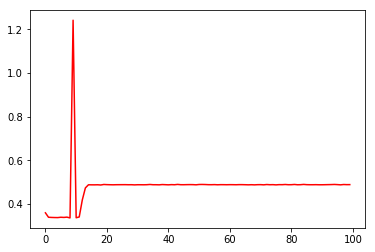

In [25]:
from keras import models, layers, optimizers, regularizers
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm

hidden_units = 12    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 100         # how many epochs to train for
batch_size = 32    # how many samples to use for each gradient descent update

# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=17, units=hidden_units, activation=activation))
model.add(layers.Dense(input_dim=hidden_units, units=6, activation=activation))
model.add(layers.Dense(input_dim=6, units=3, activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=3, units=1, activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=learning_rate), metrics=['accuracy'])

# train the parameters
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

import matplotlib.pyplot as plt
plt.plot(range(len(losses)), losses, 'r')
plt.show();

結果還是 Logistic Regression 最好.